In [1]:
%cd ..

import h5py
import matplotlib.pyplot as plt
import numpy as np

/data_1/renkaiwen/CS-ViT


/data_1/renkaiwen/CS-ViT/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
prediction_dexycb = h5py.File(
    "/data_1/renkaiwen/CS-ViT/checkpoints/spatial_dexycb_swint_spenc_addpat_noti_20250521_2/eval_dexycb_spatial_full_20250522.h5"
)
prediction_ho3d = h5py.File(
    "/data_1/renkaiwen/CS-ViT/checkpoints/spatial_ho3d_swinb_spenc_addpat_ti_20250525_1/eval_ho3d_spatial_realtime_20250527.h5"
)

In [20]:
gt_dexycb = prediction_dexycb["joint_cam_gt"][::]
gt_ho3d = prediction_ho3d["joint_cam_gt"]

<Figure size 640x480 with 0 Axes>

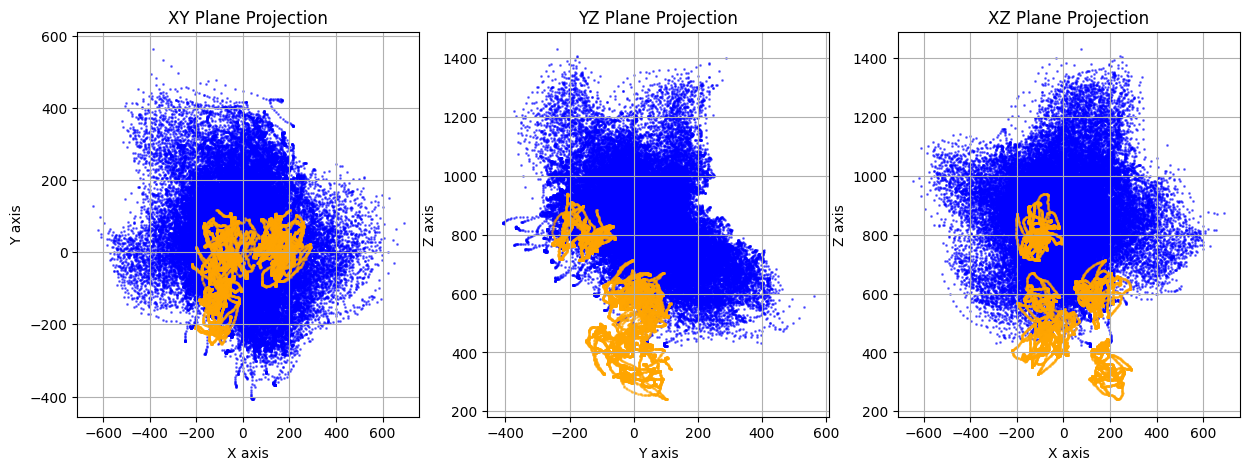

In [ ]:
%matplotlib inline

def plot_3d_projections(root_delta, ax1, ax2, ax3, c):
    """
    绘制3D点在XY、YZ、XZ投影平面上的分布

    参数:
        root_delta: numpy数组, 形状为[N,3], 包含X,Y,Z坐标
    """
    # 创建图形和3D子图
    # ax1, ax2, ax3 = axs

    # XY平面投影
    # ax1 = fig.add_subplot(131)
    ax1.scatter(root_delta[:, 0], root_delta[:, 1], alpha=0.5, c=c, s=1)
    ax1.set_title('XY Plane Projection'
    ax1.set_xlabel('X axis')
    ax1.set_ylabel('Y axis')
    ax1.grid(True)
    # ax1.set_aspect("square")

    # YZ平面投影
    # ax2 = fig.add_subplot(132)
    ax2.scatter(root_delta[:, 1], root_delta[:, 2], alpha=0.5, c=c, s=1)
    ax2.set_title('YZ Plane Projection')
    ax2.set_xlabel('Y axis')
    ax2.set_ylabel('Z axis')
    ax2.grid(True)
    # ax2.set_aspect("square")

    # XZ平面投影
    # ax3 = fig.add_subplot(133)
    ax3.scatter(root_delta[:, 0], root_delta[:, 2], alpha=0.5, c=c, s=1)
    ax3.set_title('XZ Plane Projection')
    ax3.set_xlabel('X axis')
    ax3.set_ylabel('Z axis')
    ax3.grid(True)
    # ax3.set_aspect("square")

    # plt.tight_layout()
    # plt.show()

plt.clf()
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

root_gt_dexycb = gt_dexycb[:, 0]
root_gt_ho3d = gt_ho3d[:, 0]

plot_3d_projections(root_gt_dexycb, ax1, ax2, ax3, c="blue")
plot_3d_projections(root_gt_ho3d, ax1, ax2, ax3, c="orange")